# Data Analysis in Pandas(Telangana Tourism Dataset)

Created by:Dhrubajyoti Das

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# PROBLEM STATEMENT:Telangana is one of India’s leading states and has published its tourism data under its open data policy.The task is to find the patterns in the given data, do additional research, and give data-informed recommendations to the Telangana government which can be used to increase their revenue by improving administrative operations.

# Merging domestic files

In [2]:
df_domestic_visitors2016 = pd.read_csv('domestic_visitors/domestic_visitors_2016.csv')
df_domestic_visitors2017 = pd.read_csv('domestic_visitors/domestic_visitors_2017.csv')
df_domestic_visitors2018 = pd.read_csv('domestic_visitors/domestic_visitors_2018.csv')
df_domestic_visitors2019 = pd.read_csv('domestic_visitors/domestic_visitors_2019.csv')

In [3]:
domestic=pd.concat([df_domestic_visitors2016,df_domestic_visitors2017,df_domestic_visitors2018,df_domestic_visitors2019])

In [4]:
domestic.shape

(1512, 5)

# Merging foreign files

In [5]:
df_foreign_visitors2016 = pd.read_csv('foreign_visitors/foreign_visitors_2016.csv')
df_foreign_visitors2017 = pd.read_csv('foreign_visitors/foreign_visitors_2017.csv')
df_foreign_visitors2018 = pd.read_csv('foreign_visitors/foreign_visitors_2018.csv')
df_foreign_visitors2019 = pd.read_csv('foreign_visitors/foreign_visitors_2019.csv')

In [6]:
foreign=pd.concat([df_foreign_visitors2016,df_foreign_visitors2017,df_foreign_visitors2018,df_foreign_visitors2019])

In [7]:
foreign.shape

(1512, 5)

# Data cleaning(Domestic)

In [8]:
domestic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 395
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1482 non-null   object
dtypes: int64(1), object(4)
memory usage: 70.9+ KB


In [9]:
domestic.isnull().sum()

district     0
date         0
month        0
year         0
visitors    30
dtype: int64

In [10]:
domestic["visitors"].unique()

array(['792136', '937820', '582946', ..., '381860', '365990', '477635'],
      dtype=object)

In [11]:
domestic[domestic["visitors"]==' ']

,district,date,month,year,visitors
12,Bhadradri Kothagudem,01-01-2016,January,2016,
13,Bhadradri Kothagudem,01-02-2016,February,2016,
14,Bhadradri Kothagudem,01-03-2016,March,2016,
15,Bhadradri Kothagudem,01-04-2016,April,2016,
16,Bhadradri Kothagudem,01-05-2016,May,2016,
...,...,...,...,...,...
343,Vikarabad,01-08-2019,August,2019,
344,Vikarabad,01-09-2019,September,2019,
345,Vikarabad,01-10-2019,October,2019,
346,Vikarabad,01-11-2019,November,2019,


In [12]:
domestic["visitors"].replace([" ",np.nan], 0, inplace=True)
domestic["visitors"]=domestic["visitors"].astype(float)

# Data cleaning(Foreign)

In [13]:
foreign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 395
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1512 non-null   object
dtypes: int64(1), object(4)
memory usage: 70.9+ KB


In [14]:
foreign["visitors"].unique()

array(['2', '0', '4', ' ', '15865', '29646', '13019', '8402', '8522',
       '10284', '17142', '12842', '9397', '12808', '8084', '17620', '24',
       '22', '40', '13', '21', '11', '123', '126', '103', '75', '58',
       '68', '63', '86', '74', '37', '29', '26', '8', '10', '459', '391',
       '230', '39', '82', '88', '53', '102', '118', '108', '97', '132',
       '5', '3', '19286', '18097', '13875', '12996', '12983', '12486',
       '18144', '16985', '27856', '26368', '29170', '38933', '85', '38',
       '35', '36', '42', '45', '56', '55', '57', '20', '16', '32', '31',
       '34', '25', '41', '43', '44', '54', '47', '49', '19', '23', '18',
       '17', '28', '235', '242', '238', '209', '211', '194', '116', '219',
       '225', '236', '255', '250', '35379', '30414', '27535', '20830',
       '21554', '24677', '17456', '31217', '22809', '30072', '23487',
       '29358', '50', '60', '70', '6', '15', '52', '14', '30', '1', '150',
       '185', '160', '140', '130', '135', '145', '170', '18

In [15]:
foreign["visitors"].replace([" ",np.nan], 0, inplace=True)
foreign["visitors"]=foreign["visitors"].astype(float)

# Combining both datasets

In [16]:
combined=pd.merge(domestic,foreign,on=['district','date'])

In [17]:
combined=combined[['district','date','month_x','year_x','visitors_x','visitors_y']]

In [18]:
combined.rename(columns={'month_x':'month','year_x':'year','visitors_x':'domestic_visitors','visitors_y':'foreign_visitors'},inplace=True)

In [19]:
combined.head()

,district,date,month,year,domestic_visitors,foreign_visitors
0,Adilabad,01-01-2016,January,2016,792136.0,2.0
1,Adilabad,01-02-2016,February,2016,937820.0,0.0
2,Adilabad,01-03-2016,March,2016,582946.0,2.0
3,Adilabad,01-04-2016,April,2016,341948.0,0.0
4,Adilabad,01-05-2016,May,2016,252887.0,0.0


# Insights

# 1.Top 10 districts having the highest number of domestic visitors between 2016 to 2019

<AxesSubplot: title={'center': 'Top 10 districts for domestic visitors'}, xlabel='district'>

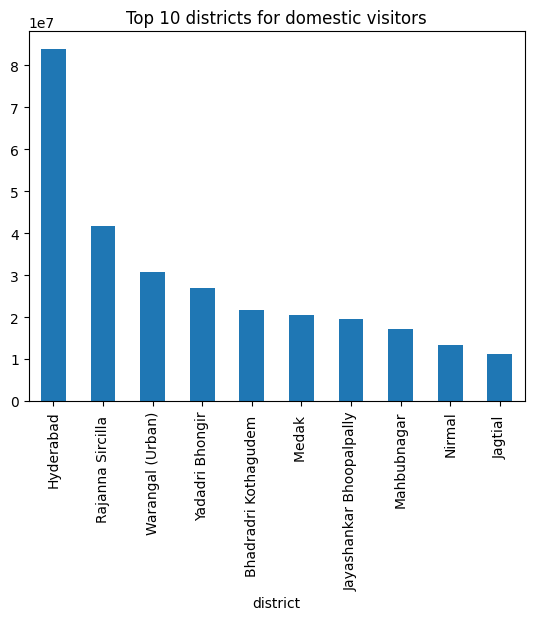

In [20]:
g=combined.groupby('district')['domestic_visitors'].sum()
Top_10=g.sort_values(ascending=False).head(10)
Top_10.plot(kind='bar',title="Top 10 districts for domestic visitors")

# 2.Top 10 districts having the highest number of foreign visitors between 2016 to 2019

In [21]:
g=combined.groupby('district')['foreign_visitors'].sum()
Top_10=g.sort_values(ascending=False).head(10)
Top_10

district
Hyderabad                   1044898.0
Warangal (Urban)               8821.0
Mahbubnagar                    2282.0
Jayashankar Bhoopalpally       1252.0
Jogulamba Gadwal                945.0
Nagarkurnool                    761.0
Mulugu                          575.0
Warangal (Rural)                306.0
Adilabad                         32.0
Mancherial                       10.0
Name: foreign_visitors, dtype: float64

# 3.Top 3 districts based on CAGR of visitors(DOMESTIC)

In [22]:
g=domestic.groupby(['year','district'])['visitors'].sum()
df_2016=g.loc[2016]
df_2019=g.loc[2019]
df_2016.drop(['Suryapet','Komaram Bheem Asifabad'],inplace=True,axis=0)
df_2019.drop(['Mulugu','Narayanapet','Komaram Bheem Asifabad'],inplace=True,axis=0)
df_2016and2019=pd.merge(df_2016,df_2019,on='district')
df_2016and2019.rename(columns = {'visitors_x':'VISITORS_2016', 'visitors_y':'VISITORS_2019'}, inplace = True)
df_2016and2019['District CAGR(%)']=df_2016and2019.apply(lambda x:(pow(x['VISITORS_2019']/x['VISITORS_2016'],1/3)-1)*100,axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_6244\1750747821.py:8: RuntimeWarning: invalid value encountered in scalar divide
  df_2016and2019['District CAGR(%)']=df_2016and2019.apply(lambda x:(pow(x['VISITORS_2019']/x['VISITORS_2016'],1/3)-1)*100,axis=1)


In [23]:
df_2016and2019.head()

,VISITORS_2016,VISITORS_2019,District CAGR(%)
district,,,
Adilabad,5075557.0,775895.0,-46.530464
Bhadradri Kothagudem,889030.0,12817737.0,143.387524
Hyderabad,23394705.0,13802362.0,-16.128976
Jagtial,623077.0,3086115.0,70.460384
Jangaon,40660.0,328890.0,100.737155


In [24]:
Top3CAGR_Domestic=df_2016and2019.sort_values('District CAGR(%)',ascending=False).head(3)


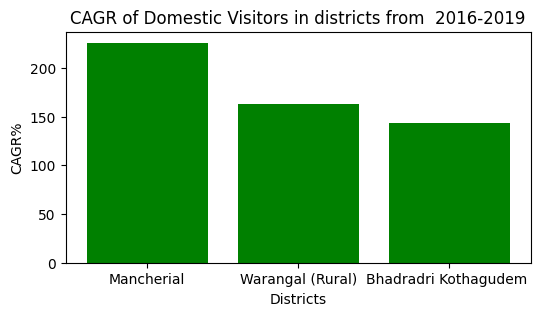

In [25]:
fig = plt.figure(figsize = (6, 3))
plt.bar(Top3CAGR_Domestic.index,Top3CAGR_Domestic['District CAGR(%)'],color='green')
plt.xlabel("Districts")
plt.ylabel("CAGR%")
plt.title("CAGR of Domestic Visitors in districts from  2016-2019")
plt.show()

# 4.Top 3 districts based on CAGR of visitors(FOREIGN)


In [26]:
g=foreign.groupby(['year','district'])['visitors'].sum()
df_2016=g.loc[2016]
df_2019=g.loc[2019]
df_2019.drop(['Mulugu','Narayanpet'],inplace=True,axis=0)
df_2016and2019=pd.merge(df_2016,df_2019,on='district')
df_2016and2019.rename(columns = {'visitors_x':'VISITORS_2016', 'visitors_y':'VISITORS_2019'}, inplace = True)
df_2016and2019['District CAGR(%)']=df_2016and2019.apply(lambda x:(pow(x['VISITORS_2019']/x['VISITORS_2016'],1/3)-1)*100,axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_6244\317429990.py:7: RuntimeWarning: invalid value encountered in scalar divide
  df_2016and2019['District CAGR(%)']=df_2016and2019.apply(lambda x:(pow(x['VISITORS_2019']/x['VISITORS_2016'],1/3)-1)*100,axis=1)
C:\Users\dell\AppData\Local\Temp\ipykernel_6244\317429990.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  df_2016and2019['District CAGR(%)']=df_2016and2019.apply(lambda x:(pow(x['VISITORS_2019']/x['VISITORS_2016'],1/3)-1)*100,axis=1)


In [27]:
Top3CAGR_Foreign=df_2016and2019.sort_values('District CAGR(%)',ascending=False)

Top3CAGR_Foreign.replace([np.inf, -np.inf], np.nan, inplace=True)
Top3CAGR_Foreign.dropna(inplace=True)
Top3CAGR_Foreign=Top3CAGR_Foreign.head(3)

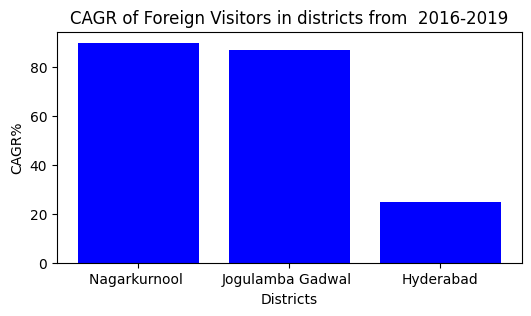

In [28]:
fig = plt.figure(figsize = (6, 3))
plt.bar(Top3CAGR_Foreign.index,Top3CAGR_Foreign['District CAGR(%)'],color='Blue')
plt.xlabel("Districts")
plt.ylabel("CAGR%")
plt.title("CAGR of Foreign Visitors in districts from  2016-2019")
plt.show()

# 5.Bottom 3 districts based on CAGR of visitors(DOMESTIC)

In [29]:
Bottom3CAGR_Domestic=df_2016and2019.sort_values('District CAGR(%)',ascending=True).head(3)

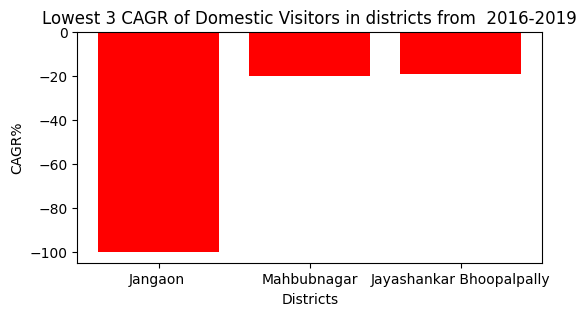

In [30]:
fig = plt.figure(figsize = (6, 3))
plt.bar(Bottom3CAGR_Domestic.index,Bottom3CAGR_Domestic['District CAGR(%)'],color='red')
plt.xlabel("Districts")
plt.ylabel("CAGR%")
plt.title("Lowest 3 CAGR of Domestic Visitors in districts from  2016-2019")
plt.show()

# 6.Bottom 3 districts based on CAGR of visitors(FOREIGN)

In [31]:
Bottom3CAGR_Foreign=df_2016and2019.sort_values('District CAGR(%)',ascending=True)
Bottom3CAGR_Foreign.replace([np.inf, -np.inf], np.nan, inplace=True)
Bottom3CAGR_Foreign.dropna(inplace=True)
Bottom3CAGR_Foreign=Bottom3CAGR_Foreign.head(3)

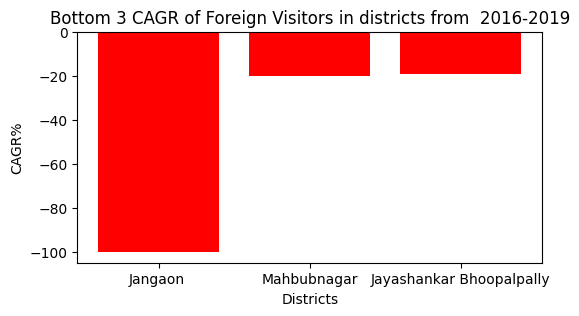

In [32]:
fig = plt.figure(figsize = (6, 3))
plt.bar(Bottom3CAGR_Foreign.index,Bottom3CAGR_Foreign['District CAGR(%)'],color='red')
plt.xlabel("Districts")
plt.ylabel("CAGR%")
plt.title("Bottom 3 CAGR of Foreign Visitors in districts from  2016-2019")
plt.show()

# 7.What are the peak and low season months for Hyderabad based on Data from 2016 to 2019


In [33]:
hyd=combined[combined.district=='Hyderabad']
hyd_domestic=hyd.groupby('month')['domestic_visitors'].sum().sort_values(ascending=False)
hyd_domestic=hyd_domestic.reset_index()
hyd_domestic['monthnumber']=pd.to_datetime(hyd_domestic['month'],format='%B')
hyd_domestic['monthnumber']=hyd_domestic['monthnumber'].dt.month
hyd_domestic=hyd_domestic.sort_values(by=['monthnumber'])
hyd_domestic.domestic_visitors=round(hyd_domestic.domestic_visitors,2)
hyd_domestic

,month,domestic_visitors,monthnumber
3,January,6452101.0,1
11,February,5014430.0,2
10,March,5227626.0,3
4,April,6126839.0,4
5,May,6049214.0,5
0,June,16897783.0,6
8,July,5552527.0,7
6,August,5750967.0,8
9,September,5312283.0,9
2,October,6552397.0,10


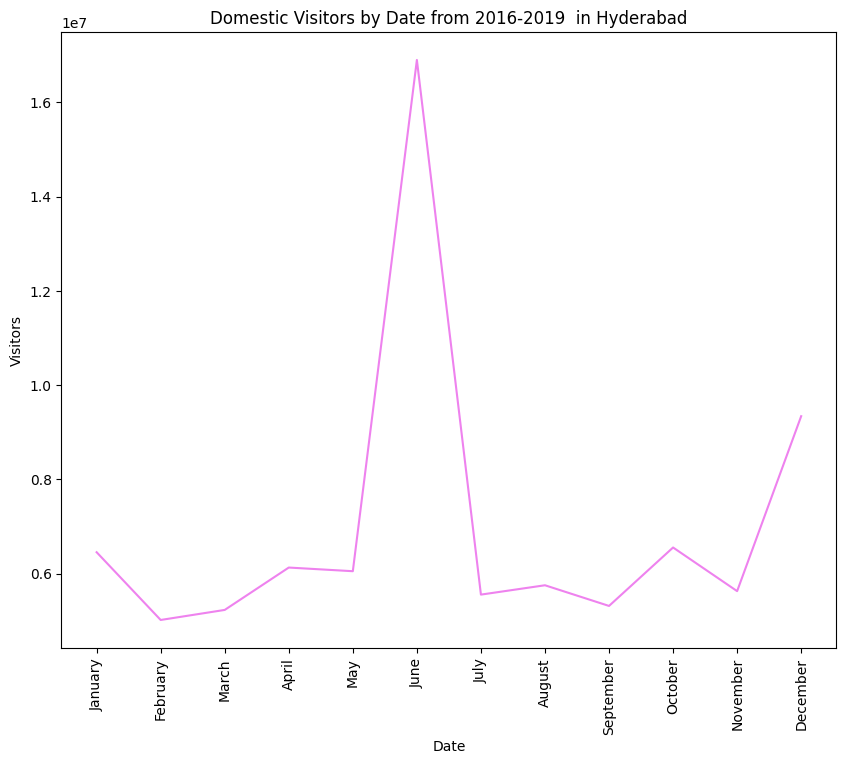

In [34]:
fig = plt.figure(figsize = (10, 8))
plt.plot(hyd_domestic.month,hyd_domestic.domestic_visitors,color='violet')
plt.xlabel("Date")
plt.ylabel("Visitors")
plt.xticks(rotation=90)
plt.title("Domestic Visitors by Date from 2016-2019  in Hyderabad")
plt.show()

In [35]:
hyd=combined[combined.district=='Hyderabad']
hyd_foreign=combined.groupby('month')['foreign_visitors'].mean().sort_values(ascending=False)
hyd_foreign=hyd_foreign.reset_index()
hyd_foreign['monthnumber']=pd.to_datetime(hyd_foreign['month'],format='%B')
hyd_foreign['monthnumber']=hyd_foreign['monthnumber'].dt.month
hyd_foreign=hyd_foreign.sort_values(by=['monthnumber'])
hyd_foreign.foreign_visitors=round(hyd_foreign.foreign_visitors,2)
hyd_foreign

,month,foreign_visitors,monthnumber
1,January,865.02,1
2,February,842.18,2
8,March,621.40,3
10,April,492.17,4
11,May,491.23,5
9,June,548.64,6
7,July,653.08,7
6,August,680.13,8
4,September,762.96,9
3,October,793.03,10


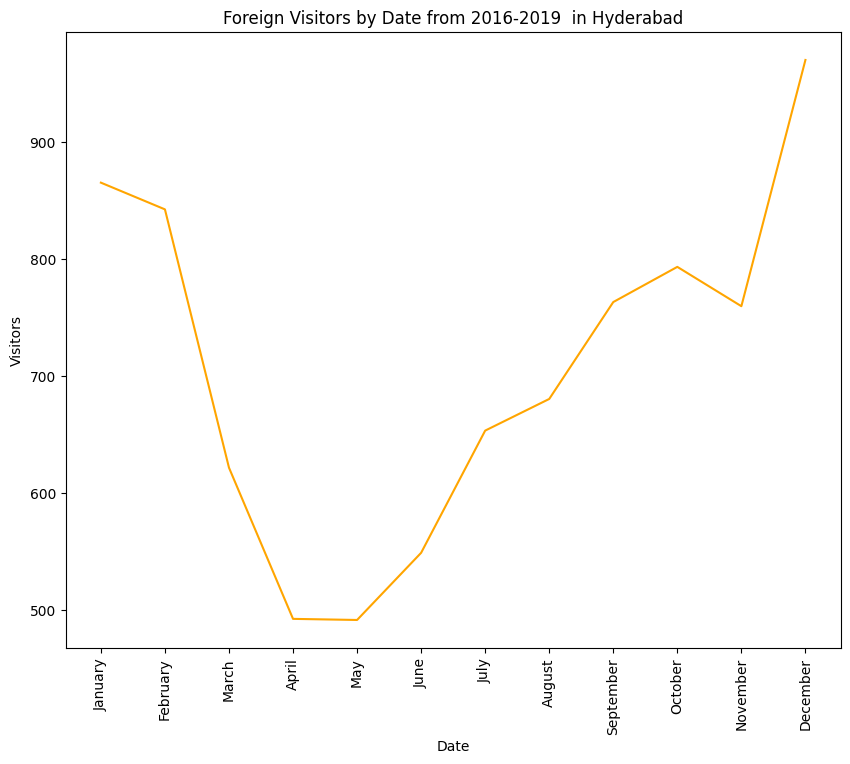

In [36]:
fig = plt.figure(figsize = (10, 8))
plt.plot(hyd_foreign.month,hyd_foreign.foreign_visitors,color='orange')
plt.xlabel("Date")
plt.ylabel("Visitors")
plt.xticks(rotation=90)
plt.title("Foreign Visitors by Date from 2016-2019  in Hyderabad")
plt.show()

# 8.Show top and bottom 3 districts with high domestic to  foreign tourist ratio

In [37]:
x=combined.groupby('district')['domestic_visitors'].sum()
p=x.reset_index()
p.district.unique()

array(['Adilabad', 'Bhadradri Kothagudem ', 'Hyderabad', 'Jagtial ',
       'Jangaon ', 'Jayashankar Bhoopalpally', 'Jogulamba Gadwal ',
       'Kamareddy ', 'Karimnagar ', 'Khammam', 'Komaram Bheem Asifabad',
       'Mahabubabad ', 'Mahbubnagar', 'Mancherial', 'Medak ', 'Medchal ',
       'Mulugu', 'Nagarkurnool ', 'Nalgonda', 'Nirmal', 'Nizamabad',
       'Peddapalli', 'Rajanna Sircilla ', 'Ranga Reddy', 'Sangareddy ',
       'Siddipet', 'Suryapet', 'Vikarabad', 'Wanaparthy ',
       'Warangal (Rural)', 'Warangal (Urban)', 'Yadadri Bhongir'],
      dtype=object)

In [38]:
y=combined.groupby('district')['foreign_visitors'].sum()
z=y.reset_index()
z.district.unique()

array(['Adilabad', 'Bhadradri Kothagudem ', 'Hyderabad', 'Jagtial ',
       'Jangaon ', 'Jayashankar Bhoopalpally', 'Jogulamba Gadwal ',
       'Kamareddy ', 'Karimnagar ', 'Khammam', 'Komaram Bheem Asifabad',
       'Mahabubabad ', 'Mahbubnagar', 'Mancherial', 'Medak ', 'Medchal ',
       'Mulugu', 'Nagarkurnool ', 'Nalgonda', 'Nirmal', 'Nizamabad',
       'Peddapalli', 'Rajanna Sircilla ', 'Ranga Reddy', 'Sangareddy ',
       'Siddipet', 'Suryapet', 'Vikarabad', 'Wanaparthy ',
       'Warangal (Rural)', 'Warangal (Urban)', 'Yadadri Bhongir'],
      dtype=object)

In [39]:
w=x.values/y.values

C:\Users\dell\AppData\Local\Temp\ipykernel_6244\3745927619.py:1: RuntimeWarning: divide by zero encountered in divide
  w=x.values/y.values
C:\Users\dell\AppData\Local\Temp\ipykernel_6244\3745927619.py:1: RuntimeWarning: invalid value encountered in divide
  w=x.values/y.values


In [40]:
dtof_ratio=pd.DataFrame({'district':y.index,'domestic_to_foreign_ratio':w})
dtof_ratio.head()

,district,domestic_to_foreign_ratio
0,Adilabad,2.287992e+05
1,Bhadradri Kothagudem,inf
2,Hyderabad,8.029584e+01
3,Jagtial,inf
4,Jangaon,4.131400e+05


In [41]:
dtof_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)
dtof_ratio.dropna(inplace=True)
dtof_ratio['domestic_to_foreign_ratio']=dtof_ratio['domestic_to_foreign_ratio'].round(decimals=2)
dtof_ratio.head()

,district,domestic_to_foreign_ratio
0,Adilabad,228799.22
2,Hyderabad,80.30
4,Jangaon,413140.00
5,Jayashankar Bhoopalpally,15681.20
6,Jogulamba Gadwal,7209.88


In [42]:
Top_3_dtofratio=dtof_ratio.sort_values('domestic_to_foreign_ratio',ascending=False)
Top_3_dtofratio.head(3)

,district,domestic_to_foreign_ratio
19,Nirmal,6657898.00
4,Jangaon,413140.00
0,Adilabad,228799.22


In [43]:
Bottom_3_dtofratio=dtof_ratio.sort_values('domestic_to_foreign_ratio',ascending=True)
Bottom_3_dtofratio.head(3)

,district,domestic_to_foreign_ratio
2,Hyderabad,80.30
29,Warangal (Rural),2677.00
16,Mulugu,3164.87


In [44]:
combined.to_csv('combined.csv')